In [31]:
import numpy as np
import pandas as pd
import matplotlib as plt
import keras as kr
import math
import datetime
import pickle
import tqdm
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
sns.set_style("darkgrid")
colors = sns.color_palette("Set2")
plt.rcParams["font.family"] = ["Microsoft JhengHei"]
#plt.rcParams["font.sans-serif"] = ["KaiTi"]
#plt.rcParams["font.serif"] = ["KaiTi"]
plt.rcParams["axes.unicode_minus"] = False
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",2000)

df=pd.read_csv(r'C:\Users\akari\真誘卵桶卵粒數統計+天氣(里)+補里的缺失值+cdc(里)+到11月.csv',encoding ="utf-8")
df1=pd.read_csv(r'C:\Users\akari\cdc今年病例(drop+weekname)+到11月.csv',encoding ="utf-8")

In [32]:
ddf=pd.read_csv(f'./天氣原資料2023-01-09/467410-2023-01.csv')#隨便一個dataframe
ddf=ddf.drop(ddf.index,inplace=True)

dist0 = df['DIST'].dropna().unique().tolist()
for index, value in enumerate(dist0):
    tdf= df[df['DIST'] == value]
    tdf = pd.DataFrame({'POSITIVE_NUM': tdf.sort_values('WeekName').groupby(['WeekName'])['POSITIVE_NUM'].mean()
                        ,'DIST': value
                        ,'測站氣壓': tdf.sort_values('WeekName').groupby(['WeekName'])['測站氣壓'].mean()
                        ,'氣溫': tdf.sort_values('WeekName').groupby(['WeekName'])['氣溫'].mean()
                        ,'最高氣溫': tdf.sort_values('WeekName').groupby(['WeekName'])['最高氣溫'].mean()
                        ,'最低氣溫': tdf.sort_values('WeekName').groupby(['WeekName'])['最低氣溫'].mean()
                        ,'相對溼度': tdf.sort_values('WeekName').groupby(['WeekName'])['相對溼度'].mean()
                        ,'最小相對溼度': tdf.sort_values('WeekName').groupby(['WeekName'])['最小相對溼度'].mean()
                        ,'風速': tdf.sort_values('WeekName').groupby(['WeekName'])['風速'].mean()
                        ,'風向(360degree)': tdf.sort_values('WeekName').groupby(['WeekName'])['風向(360degree)'].mean()
                        ,'降水量': tdf.sort_values('WeekName').groupby(['WeekName'])['降水量'].mean()})
    ddf=pd.concat([ddf,tdf],axis=0)
ddf["WeekName"]=ddf.index
ddf=pd.DataFrame(np.array(ddf),columns=['POSITIVE_NUM','DIST','測站氣壓',"氣溫",'最高氣溫','最低氣溫',"相對溼度",'最小相對溼度',"風速","風向(360degree)","降水量","WeekName"])

ddf.sort_values(by=["WeekName","DIST"],inplace=True,ignore_index=True)

In [3]:

ddf["案例數"]=0
for i in tqdm.tqdm_notebook(range(0,len(ddf))):
    for j in range(0,len(df1)):
        if ((int(ddf["WeekName"][i])==int(df1["發病日"][j])) and (ddf["DIST"][i]==df1["居住鄉鎮"][j]) ):
            ddf["案例數"][i]=ddf["案例數"][i]+1


C:\Users\akari\AppData\Local\Temp/ipykernel_51064/3991124557.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0,len(ddf))):


  0%|          | 0/470 [00:00<?, ?it/s]

C:\Users\akari\AppData\Local\Temp/ipykernel_51064/3991124557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf["案例數"][i]=ddf["案例數"][i]+1


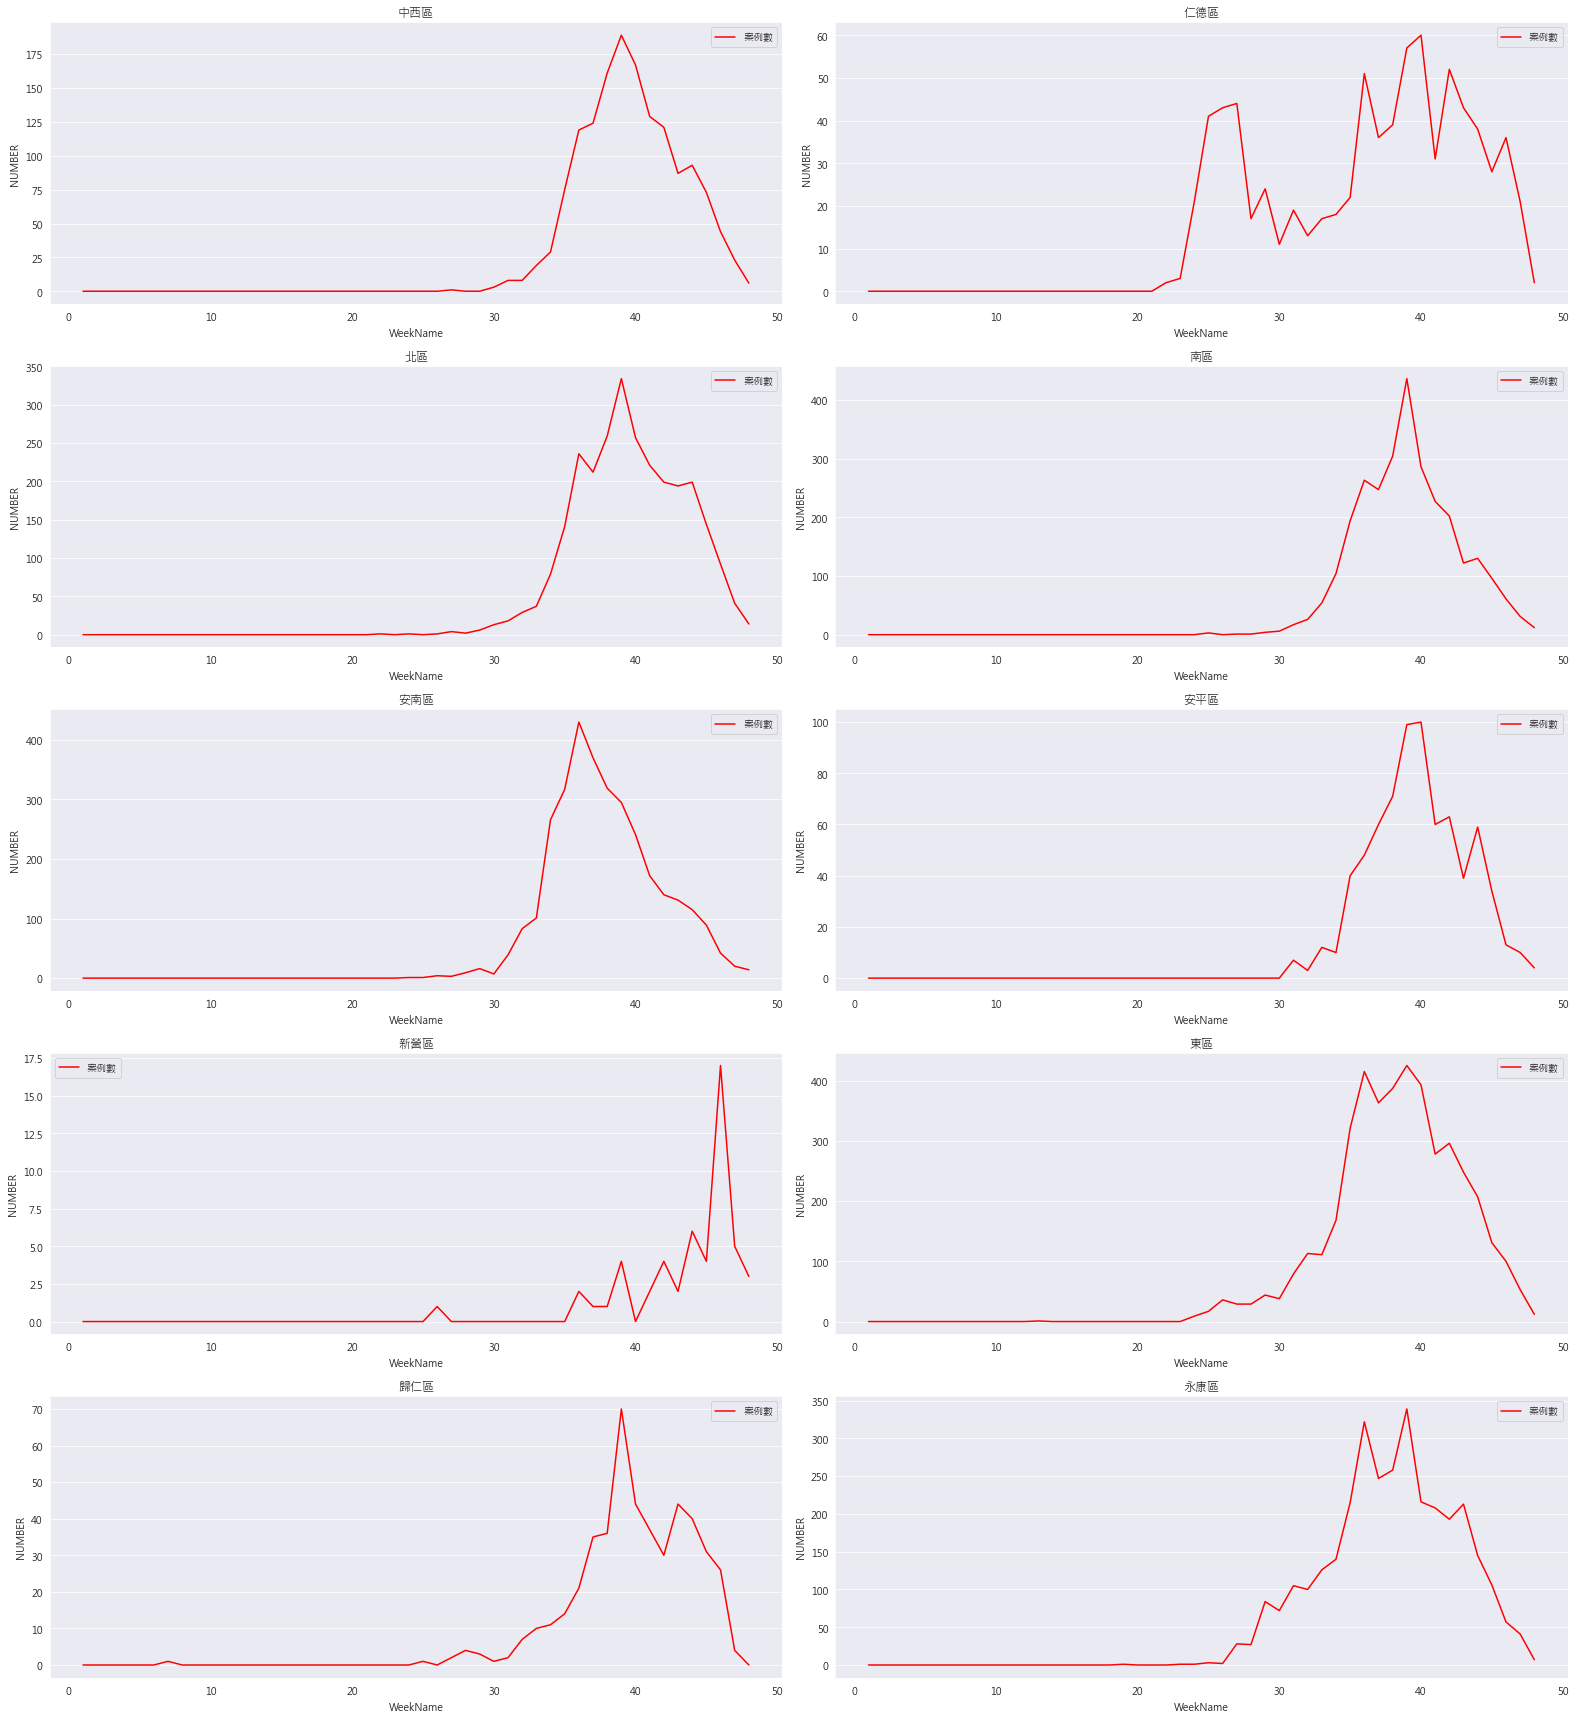

In [12]:
#顯現各區案例數
def plot(df,fig_size: tuple=(22,24)):
    area = df['DIST'].dropna().unique().tolist()
    plt.figure(figsize=fig_size)
    n_cols = 2
    n_rows = len(area) // n_cols + (len(area) % n_cols > 0)
    
    for index, value in enumerate(area):
        tmp_df = df[df['DIST'] == value]
        tmp_df1 = df[df['DIST'] == value]
        tmp_df = pd.DataFrame({'POSITIVE_NUM': tmp_df.sort_values('WeekName').groupby(['WeekName'])['POSITIVE_NUM'].mean()})
        tmp_df1 = pd.DataFrame({'案例數': tmp_df1.sort_values('WeekName').groupby(['WeekName'])['案例數'].mean()})
        new_data_range = pd.date_range(1, 48, freq="D")
        
        ax = plt.subplot(n_rows, n_cols, index+1)
        ax.set_title(value)
        ax.set_xlabel("WeekName")
        ax.set_ylabel("NUMBER")
        ax.grid(False, axis='x')
        #ax.bar(tmp_df.index,tmp_df['POSITIVE_NUM'],label="POSITIVE_NUM",color='green')
        ax.plot(tmp_df1.index,tmp_df1['案例數'],label="案例數",color='red')
        plt.legend()

    plt.tight_layout()
    plt.show()


plot(ddf)

In [4]:
ddf

,POSITIVE_NUM,DIST,測站氣壓,氣溫,最高氣溫,最低氣溫,相對溼度,最小相對溼度,風速,風向(360degree),降水量,WeekName,案例數
0,0.75,中西區,1017.885714,18.957143,23.057143,16.528571,82.0,65.714286,3.628571,110.0,0.071429,1,0
1,0.625,仁德區,1017.171429,19.585714,24.157143,17.114286,78.571429,62.0,2.542857,250.0,0.071429,1,0
2,0.575758,北區,1017.485714,18.957143,22.957143,15.771429,82.0,66.428571,2.871429,253.428571,0.142857,1,0
3,0.675676,南區,1019.314286,19.442857,23.457143,17.128571,75.142857,55.714286,2.514286,31.285714,0.214286,1,0
4,0.627451,安南區,1019.342857,18.571429,22.271429,16.185714,91.428571,81.714286,1.285714,300.0,0.714286,1,0
5,0.384615,安平區,1019.1,18.514286,22.142857,16.385714,83.857143,69.714286,2.642857,27.428571,0.214286,1,0
6,0.5,新營區,1017.1,18.371429,22.857143,15.828571,81.142857,65.571429,2.257143,242.142857,1.428571,1,0
7,0.333333,東區,1017.885714,18.957143,23.057143,16.528571,82.0,65.714286,3.628571,110.0,0.071429,1,0
8,0.0,歸仁區,1018.2,19.071429,24.342857,16.028571,90.428571,67.571429,1.185714,54.571429,0.142857,1,0
9,0.418605,永康區,1019.571429,18.985714,23.557143,16.428571,84.571429,67.142857,3.471429,358.571429,0.285714,1,0


In [183]:
#只到9月則需要執行這格，到11月不用
ddf=ddf[:350]

In [ ]:
#下面添加的要幾周內的甚麼特徵都可以自行調整

In [35]:
#一週
word="POSITIVE_NUM"  #測站氣壓,氣溫,相對溼度,最高氣溫,最低氣溫,最小相對溼度,案例數,"POSITIVE_NUM",風速


ddf[f"{word}__1week_ago"]=0.0
#ddf[f"{word}__2week_ago"]=0.0


for i in range(0,len(ddf)):
    if ddf["WeekName"][i]>=2:
        ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]


C:\Users\akari\AppData\Local\Temp/ipykernel_51064/2385470963.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]


In [36]:
#兩週
word="相對溼度"  #測站氣壓,氣溫,相對溼度,最高氣溫,最低氣溫,最小相對溼度,案例數,"POSITIVE_NUM"


ddf[f"{word}__1week_ago"]=0.0
ddf[f"{word}__2week_ago"]=0.0


for i in range(0,len(ddf)):
    if ddf["WeekName"][i]==2:
        ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
    if ddf["WeekName"][i]>=3:
        ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
        ddf[f"{word}__2week_ago"][i]= ddf[f"{word}"][i-20]
        


C:\Users\akari\AppData\Local\Temp/ipykernel_51064/3024806152.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
C:\Users\akari\AppData\Local\Temp/ipykernel_51064/3024806152.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
C:\Users\akari\AppData\Local\Temp/ipykernel_51064/3024806152.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [37]:
#四週
word="風速"  #測站氣壓,氣溫,相對溼度,最高氣溫,最低氣溫,最小相對溼度,案例數,"POSITIVE_NUM",風速


ddf[f"{word}__1week_ago"]=0.0
ddf[f"{word}__2week_ago"]=0.0
ddf[f"{word}__3week_ago"]=0.0
ddf[f"{word}__4week_ago"]=0.0


for i in range(0,len(ddf)):
    if ddf["WeekName"][i]==2:
        ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
    if ddf["WeekName"][i]>=3:
        ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
        ddf[f"{word}__2week_ago"][i]= ddf[f"{word}"][i-20]
    if ddf["WeekName"][i]>=5:
        ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
        ddf[f"{word}__2week_ago"][i]= ddf[f"{word}"][i-20]
        ddf[f"{word}__3week_ago"][i]= ddf[f"{word}"][i-30]
    if ddf["WeekName"][i]>=6:
        ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
        ddf[f"{word}__2week_ago"][i]= ddf[f"{word}"][i-20]
        ddf[f"{word}__3week_ago"][i]= ddf[f"{word}"][i-30]
        ddf[f"{word}__4week_ago"][i]= ddf[f"{word}"][i-40]

C:\Users\akari\AppData\Local\Temp/ipykernel_22692/1502450680.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
C:\Users\akari\AppData\Local\Temp/ipykernel_22692/1502450680.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
C:\Users\akari\AppData\Local\Temp/ipykernel_22692/1502450680.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [7]:
#五週
word="案例數"  #測站氣壓,氣溫,相對溼度,最高氣溫,最低氣溫,最小相對溼度,案例數


ddf[f"{word}__1week_ago"]=0.0
ddf[f"{word}__2week_ago"]=0.0
ddf[f"{word}__3week_ago"]=0.0
ddf[f"{word}__4week_ago"]=0.0
ddf[f"{word}__5week_ago"]=0.0

for i in range(0,len(ddf)):
    if ddf["WeekName"][i]==2:
        ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
    if ddf["WeekName"][i]>=3:
        ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
        ddf[f"{word}__2week_ago"][i]= ddf[f"{word}"][i-20]
    if ddf["WeekName"][i]>=5:
        ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
        ddf[f"{word}__2week_ago"][i]= ddf[f"{word}"][i-20]
        ddf[f"{word}__3week_ago"][i]= ddf[f"{word}"][i-30]
    if ddf["WeekName"][i]>=6:
        ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
        ddf[f"{word}__2week_ago"][i]= ddf[f"{word}"][i-20]
        ddf[f"{word}__3week_ago"][i]= ddf[f"{word}"][i-30]
        ddf[f"{word}__4week_ago"][i]= ddf[f"{word}"][i-40]
    if ddf["WeekName"][i]>=7:
        ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
        ddf[f"{word}__2week_ago"][i]= ddf[f"{word}"][i-20]
        ddf[f"{word}__3week_ago"][i]= ddf[f"{word}"][i-30]
        ddf[f"{word}__4week_ago"][i]= ddf[f"{word}"][i-40]
        ddf[f"{word}__5week_ago"][i]= ddf[f"{word}"][i-50]

C:\Users\akari\AppData\Local\Temp/ipykernel_19396/2846793446.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
C:\Users\akari\AppData\Local\Temp/ipykernel_19396/2846793446.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf[f"{word}__1week_ago"][i]= ddf[f"{word}"][i-10]
C:\Users\akari\AppData\Local\Temp/ipykernel_19396/2846793446.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [37]:
ddf=ddf[50:]#train去除前五周已用掉的特徵
ddf.sort_values(by=["WeekName","DIST"],inplace=True,ignore_index=True)

In [38]:
#依據里做OHE，可選用
from sklearn.preprocessing import OneHotEncoder
technique = OneHotEncoder(sparse=False,
                          drop=None,
                          categories='auto',
                          handle_unknown='error')

new_dataframe = pd.DataFrame(technique.fit_transform(ddf[['DIST']]), columns=technique.categories_)

ddf =ddf.join(new_dataframe)

In [39]:
ddf.drop(["DIST","WeekName"],inplace=True,axis=1)#,"WeekName"?,"POSITIVE_NUM"?

In [41]:
ddf.drop(["測站氣壓","氣溫","最高氣溫","最低氣溫","相對溼度","最小相對溼度","風向(360degree)","降水量","風速","案例數"],inplace=True,axis=1)#,"風速","案例數"

In [42]:
#ddf.drop(["相對溼度__2week_ago","氣溫__1week_ago","POSITIVE_NUM__1week_ago"],inplace=True,axis=1)

In [43]:
ddf.drop(["相對溼度__1week_ago"],inplace=True,axis=1)

In [ ]:
#ddf.drop([""],inplace=True,axis=1)

In [421]:
#ddf.drop(["POSITIVE_NUM__2week_ago","POSITIVE_NUM__3week_ago","POSITIVE_NUM__4week_ago","風速__1week_ago"],inplace=True,axis=1)

In [46]:
ddf

,POSITIVE_NUM,風速__1week_ago,氣溫__1week_ago,POSITIVE_NUM__1week_ago,相對溼度__2week_ago,"(中西區,)","(仁德區,)","(北區,)","(南區,)","(安南區,)","(安平區,)","(新營區,)","(東區,)","(歸仁區,)","(永康區,)"
0,1.25,2.900000,21.357143,0.700000,70.857143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.128571,21.971429,0.812500,71.142857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.151515,2.228571,21.214286,1.030303,72.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.405405,2.114286,21.871429,1.270270,62.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.411765,0.828571,20.471429,1.196078,86.857143,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.384615,2.300000,20.585714,0.615385,75.714286,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.666667,1.685714,20.200000,1.666667,72.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.133333,2.900000,21.357143,1.066667,70.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,1.571429,1.085714,21.557143,0.714286,80.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.790698,2.657143,21.357143,0.674419,73.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [86]:
#ddf.drop(["案例數__4week_ago","案例數__3week_ago"],inplace=True,axis=1)#

In [47]:
#regression
y=ddf["POSITIVE_NUM"].values
x=ddf.drop(["POSITIVE_NUM"],axis=1).values

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)

In [49]:
# DS_Split=0.8
s=350 #根據九月/十一月決定是350,230
train_ds_size=s 

x_train,y_train=x[:train_ds_size],y[:train_ds_size]
x_test,y_test=x[train_ds_size:],y[train_ds_size:]

In [50]:

X_train=pd.DataFrame(x_train)
X_test=pd.DataFrame(x_test)
Y_train=pd.DataFrame(y_train)
Y_test=pd.DataFrame(y_test)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(350, 14)
(70, 14)
(350, 1)
(70, 1)


In [51]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV


cv_split = TimeSeriesSplit(n_splits=5)

#model = lgb.LGBMRegressor()
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    #"n_estimators": [100, 300, 500, 700, 900, 1000],#Regressor&Classifier皆可
    #"colsample_bytree": [0.3, 0.5, 0.7]#Regressor&Classifier皆可
}
"""
model = XGBClassifier(#objective = 'multiclass',
                         #num_class=4,                        
                         learning_rate = 0.01,
                         max_depth=5)

model = lgb.LGBMClassifier(boosting_type='gbdt',
                         objective = 'multiclass',
                         num_class=4,                        
                         metric = 'multi_logloss',
                         verbose = 0,
                         learning_rate = 0.01,
                         num_leaves = 63,
                         max_depth=5,
                         feature_fraction=0.8,
                         bagging_fraction= 0.9,
                         bagging_freq= 8,
                         lambda_l1= 0.6,
                         lambda_l2= 0)
"""



grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
#grid_search.fit(X_train, Y_train)#Regressor
grid_search.fit(x_train, y_train)#Classifier&Regressor，regression直接用fit(x_train,y_train)會更好
#.values.ravel()

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 6, 5, 10]})

In [52]:
##只刪"測站氣壓","氣溫","相對溼度","案例數"，不做ago則MAPE: 0.33
##不刪"測站氣壓","氣溫","相對溼度","案例數"，不做ago則MAPE: 0.55?但MSE低

In [53]:
#only Regressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error

#a=pd.DataFrame({"index":np.arange(0,len(Y_test))})
#testing_dates = a["index"].values.ravel()

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()

  
# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
#plot_predictions(testing_dates, Y_test, prediction)
evaluate_model(Y_test, prediction)

MAE: 0.4936876986730129
MSE: 0.4369685793982585
MAPE: 0.17817052078976112


In [202]:
#最高紀錄:
#lgbmregressor_4week_測站氣壓,氣溫,相對溼度,案例數_0.8


In [54]:
c=pd.DataFrame(y)
c.rename(columns = {0: 'True'}, inplace = True)

In [55]:
c

,True
0,1.25
1,1.0
2,1.151515
3,1.405405
4,1.411765
5,1.384615
6,1.666667
7,1.133333
8,1.571429
9,0.790698


In [60]:
true_data = pd.DataFrame(data = Y_test)

predictions_data = pd.DataFrame(data = prediction)

combined = predictions_data
combined['Actual'] = true_data[0]
combined.rename(columns = {0: 'Predicted'}, inplace = True)
#random_combined = combined.sample(n=250, random_state=100)
#random_combined.head(20)
combined

,Predicted,Actual
0,4.130455,3.0
1,4.409345,5.0
2,3.317068,2.878788
3,3.693815,3.567568
4,2.988739,3.254902
5,3.077350,3.076923
6,2.755073,3.333333
7,3.040964,2.311111
8,3.952929,4.285714
9,3.750671,3.55814


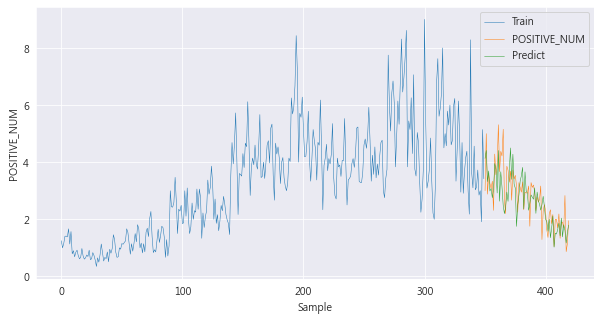

In [57]:
f, ax = plt.subplots(figsize=(10,5))
train_df=ddf[:train_ds_size]
test_df=ddf[train_ds_size:]
test_df=test_df.assign(Predict=prediction)

plt.xlabel("Sample")
plt.ylabel("POSITIVE_NUM")
plt.plot(train_df["POSITIVE_NUM"],linewidth=0.5,label="Train")
plt.plot(test_df["POSITIVE_NUM"],linewidth=0.5,label="POSITIVE_NUM")
plt.plot(test_df["Predict"],linewidth=0.5,label="Predict")
plt.legend()
plt.show()

f.savefig("plot10-5.png",dpi=200,bbox_inches='tight')

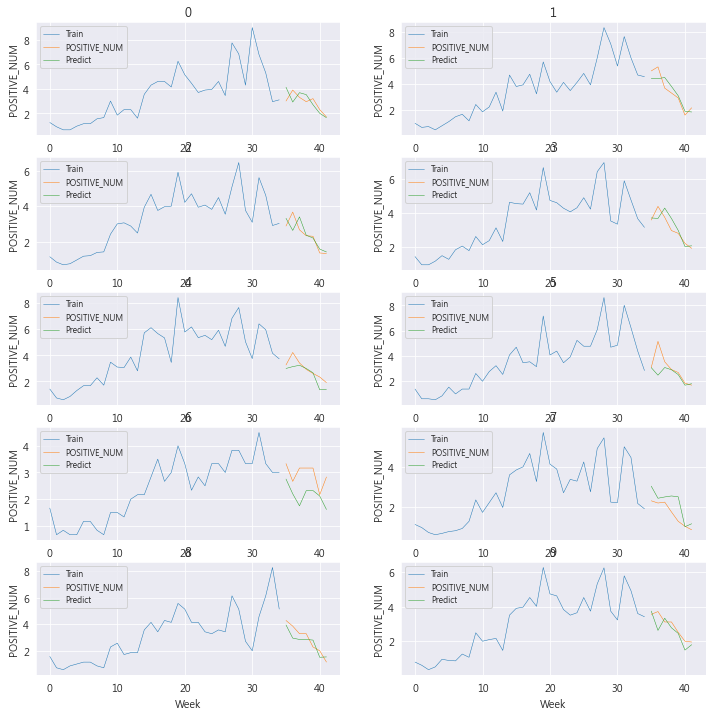

In [61]:
#輸出各區分開的圖

    
plt.figure(figsize=(12,12))
n_cols = 2
n_rows = 10 // n_cols + (10 % n_cols > 0)

for i in range(0,10):#現在只是因為方便而將十個區全部輸出，到時根據i=多少決定輸出哪一區
    tdf_train=[]
    y_test=[]
    pred=[]
    for j in range(0,35):
        tdf_train.append(ddf["POSITIVE_NUM"][j*10+i])
    tdf=pd.DataFrame(tdf_train)
    for k in range(0,7):
        test=list(Y_test.values)
        y_test.append(test[k*10+i])
        pred.append(prediction[k*10+i])
    ttdf=pd.DataFrame(y_test)
    ttdf=ttdf.assign(Predict=pred)#第i區從第1週到現在的週數預測及實際的結果的dataframe
    ttdf.index=[35,36,37,38,39,40,41]#35+7
    
    ax = plt.subplot(n_rows, n_cols, i+1)
    ax.set_title(i)    
    ax.set_xlabel("Week")
    ax.set_ylabel("POSITIVE_NUM")
    ax.plot(tdf,linewidth=0.5,label="Train")
    ax.plot(ttdf[0],linewidth=0.5,label="POSITIVE_NUM")
    ax.plot(ttdf["Predict"],linewidth=0.5,label="Predict")
    plt.legend(loc='upper left',prop={'size':8})
    

plt.show()


## 預測上升或下降

In [206]:
updown=np.zeros((70,2))
updown=pd.DataFrame(updown)
updown.rename(columns={0:"Predicted",1:"Actual"},inplace=True)
updown=updown.astype(int)

In [207]:
for i in range(0,len(combined)):
    if combined["Predicted"][i]<c["True"][i+s-10]:
        updown["Predicted"][i]=0#down
    else:
        updown["Predicted"][i]=1#up 
    if combined["Actual"][i]<c["True"][i+s-10]:
        updown["Actual"][i]=0#down
    else:
        updown["Actual"][i]=1#up 

In [208]:
y_test=updown["Actual"]
y_pred=updown["Predicted"]

In [209]:
#最高紀錄:
#lgbmregressor_4week_測站氣壓,氣溫,相對溼度,案例數_0.8,且不要OHE區,絕不能drop降水量
updown

,Predicted,Actual
0,1,1
1,1,0
2,1,1
3,0,0
4,1,1
5,1,1
6,1,0
7,1,1
8,0,0
9,1,0


準確性：78.57%
精確率：78.43%
F1分數：78.46%
召回率：78.78%
{0: 31, 1: 39}


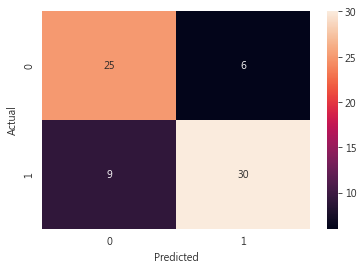

Class: 0
Number of Wrong Prediction: 9 out of 34
Percentage of True Prediction: 73.53%
***********************************************************
Class: 1
Number of Wrong Prediction: 6 out of 36
Percentage of True Prediction: 83.33%
***********************************************************


In [210]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
print(f'準確性：{accuracy * 100:.2f}%')

# 計算精確率
precision = precision_score(y_test, y_pred, average='macro')
print(f'精確率：{precision * 100:.2f}%')

# 計算F1分數
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1分數：{f1 * 100:.2f}%')

# 計算召回率
recall = recall_score(y_test, y_pred, average='macro')
print(f'召回率：{recall * 100:.2f}%')

def plot_confusion_matrix(actual_val, pred_val, title=None):
    confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])

    plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')

    if title is None:
        pass
    else:
        plot.set_title(title)

    plt.show()
    for i in range(len(confusion_matrix)):
     print("Class:",str(i))
     print("Number of Wrong Prediction:", str(sum(confusion_matrix[i])-confusion_matrix[i][i]), f"out of {sum(confusion_matrix[i])}")
     print("Percentage of True Prediction: {:.2f}%".format(confusion_matrix[i][i]*100 / sum(confusion_matrix[i])))
     print("***********************************************************")

# 看資料內各分類的總筆數
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

# 畫confusion matrix
plot_confusion_matrix(y_test,np.array(y_pred))

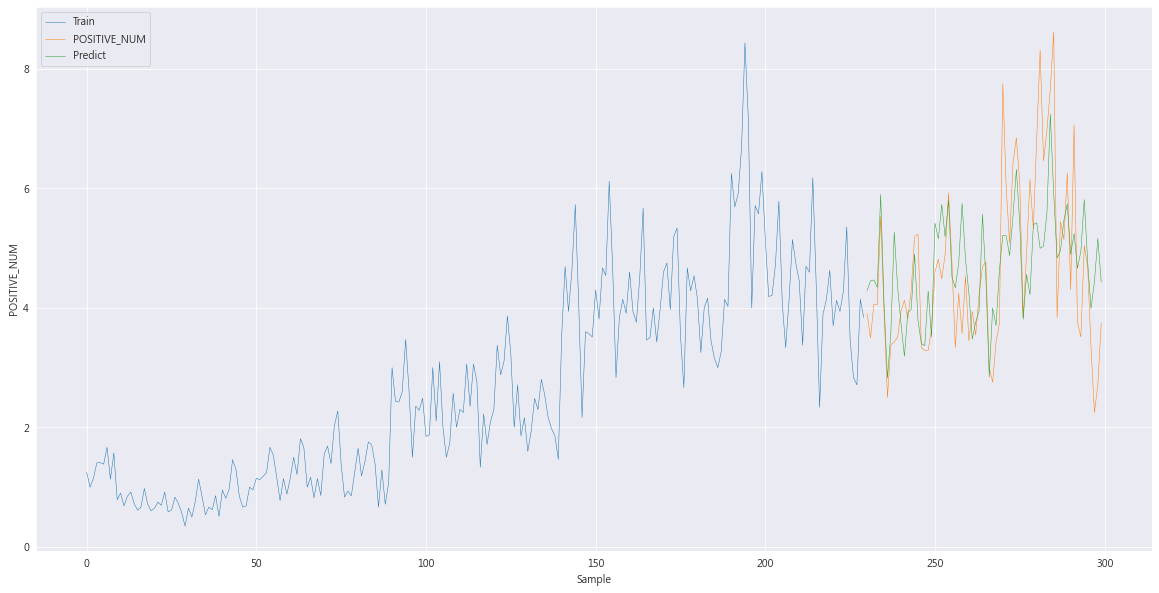

In [122]:
f, ax = plt.subplots(figsize=(20,10))
train_df=ddf[:train_ds_size]
test_df=ddf[train_ds_size:]
test_df=test_df.assign(Predict=prediction)

plt.xlabel("Sample")
plt.ylabel("POSITIVE_NUM")
plt.plot(train_df["POSITIVE_NUM"],linewidth=0.5,label="Train")
plt.plot(test_df["POSITIVE_NUM"],linewidth=0.5,label="POSITIVE_NUM")
plt.plot(test_df["Predict"],linewidth=0.5,label="Predict")
plt.legend()
plt.show()

#f.savefig("plot.png")

<AxesSubplot:>

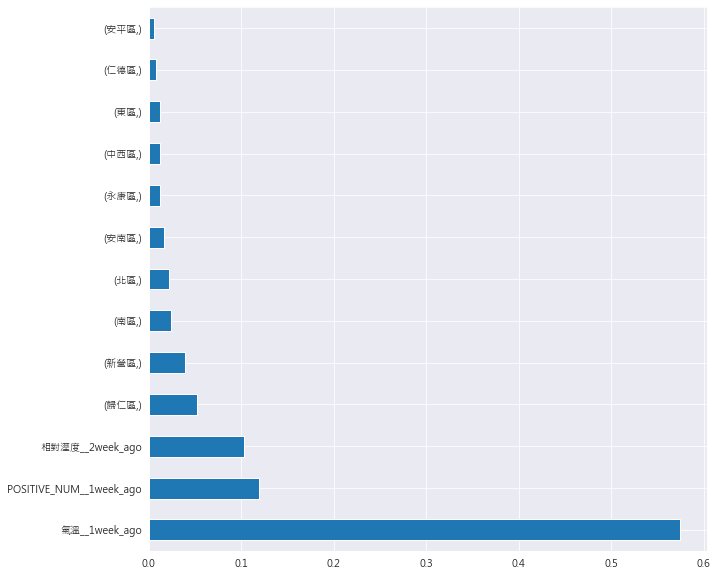

In [211]:
#feature importance
f, ax = plt.subplots(figsize=(10,10))
ff=ddf.drop(["POSITIVE_NUM"],axis=1)
(pd.Series(grid_search.best_estimator_.feature_importances_, index=ff.columns)
   .nlargest(ddf.shape[1])
   .plot(kind='barh'))